**Question 1**

Given a string `s`, *find the first non-repeating character in it and return its index*. If it does not exist, return `-1`.

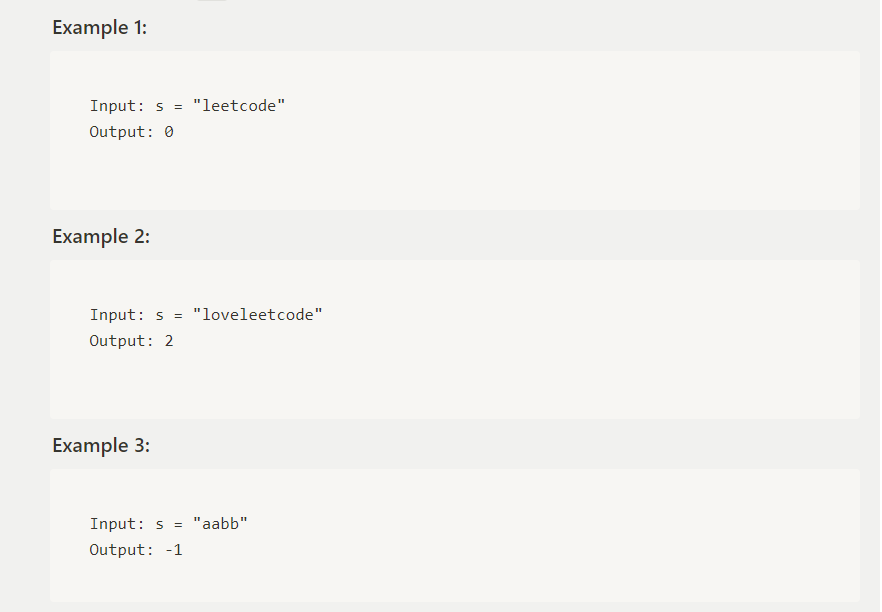

In [9]:
def firstNotRepeatingCharacter(s):
    hash_map = {}
    for i in s:
        if i not in hash_map:
            hash_map[i] = 1
        else: 
            hash_map[i] += 1
            
    for i,n in enumerate(s):
        pass
s = "loveleetcode"
find_first_unique_element(s)

{'o', 't', 'e', 'd', 'l', 'c', 'v'}


TC: O(n)
    
SC: O(n)

**Question 2**

Given a **circular integer array** `nums` of length `n`, return *the maximum possible sum of a non-empty **subarray** of* `nums`.

A **circular array** means the end of the array connects to the beginning of the array. Formally, the next element of `nums[i]` is `nums[(i + 1) % n]` and the previous element of `nums[i]` is `nums[(i - 1 + n) % n]`.

A **subarray** may only include each element of the fixed buffer `nums` at most once. Formally, for a subarray `nums[i], nums[i + 1], ..., nums[j]`, there does not exist `i <= k1`, `k2 <= j` with `k1 % n == k2 % n`.

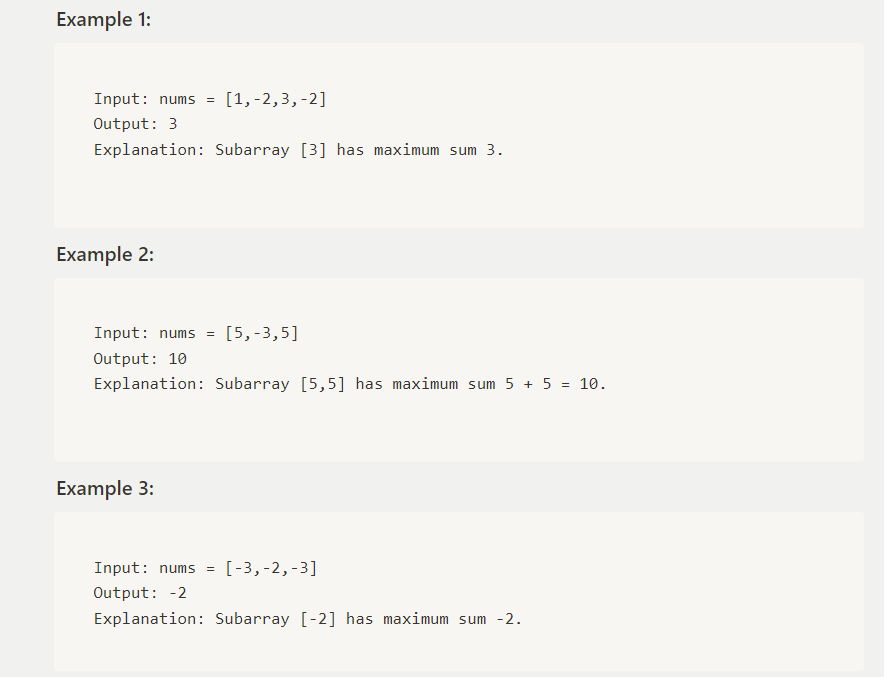

In [11]:
from typing import List

class Solution:
    def maxSubarraySumCircular(self, nums: List[int]) -> int:
        s1 = s2 = f1 = f2 = nums[0]
        for num in nums[1:]:
            f1 = num + max(f1, 0)
            f2 = num + min(f2, 0)
            s1 = max(s1, f1)
            s2 = min(s2, f2)
        return s1 if s1 <= 0 else max(s1, sum(nums) - s2)
    
    
nums = [1,-2,3,-2]

s = Solution()
s.maxSubarraySumCircular(nums)

3

TC: O(n)
    
SC: O(1)

**Question 3**

The school cafeteria offers circular and square sandwiches at lunch break, referred to by numbers `0` and `1` respectively. All students stand in a queue. Each student either prefers square or circular sandwiches.

The number of sandwiches in the cafeteria is equal to the number of students. The sandwiches are placed in a **stack**. At each step:

- If the student at the front of the queue **prefers** the sandwich on the top of the stack, they will **take it** and leave the queue.
- Otherwise, they will **leave it** and go to the queue's end.

This continues until none of the queue students want to take the top sandwich and are thus unable to eat.

You are given two integer arrays `students` and `sandwiches` where `sandwiches[i]` is the type of the `ith` sandwich in the stack (`i = 0` is the top of the stack) and `students[j]` is the preference of the `jth` student in the initial queue (`j = 0` is the front of the queue). Return *the number of students that are unable to eat.*

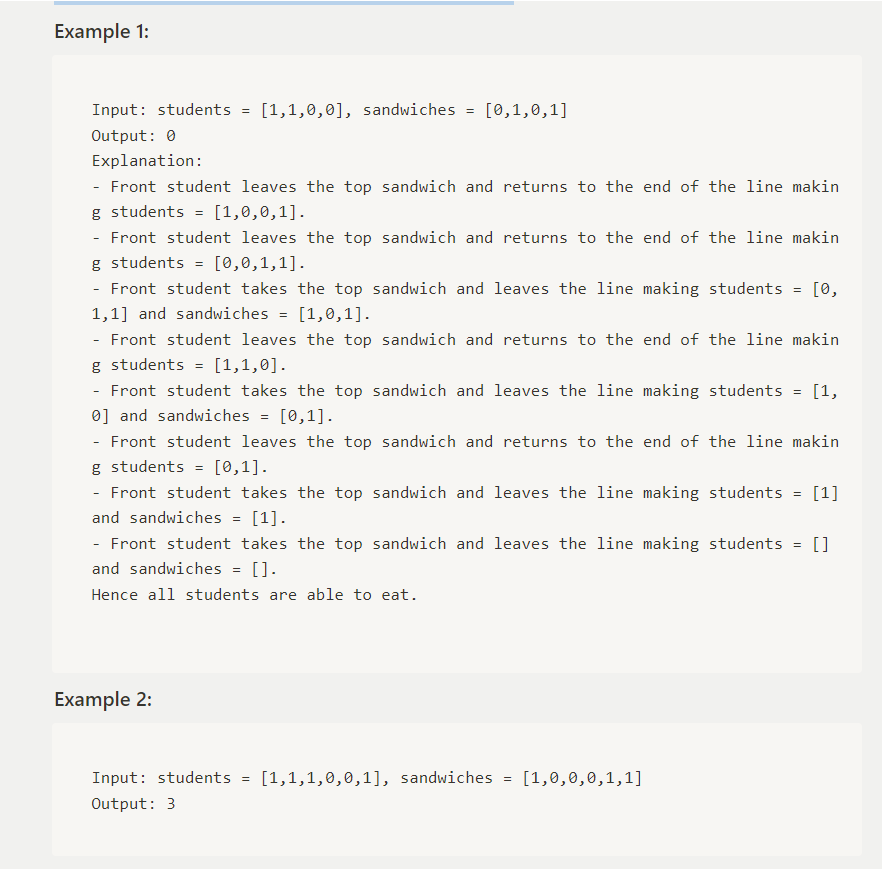

In [12]:
from collections import deque

def countStudents(students, sandwiches):
    qStudents = deque(students)

    topPositionOfSandwich = 0
    numStudentsUnableEat = 0
    while qStudents and numStudentsUnableEat < len(qStudents):
        if sandwiches[topPositionOfSandwich] == qStudents[0]:
            numStudentsUnableEat = 0

            topPositionOfSandwich += 1
            qStudents.popleft()
        else:
            numStudentsUnableEat += 1

            qStudents.append(qStudents.popleft())

    return numStudentsUnableEat


TC: O(n)
    
SC: (n)

**Question 4**

You have a `RecentCounter` class which counts the number of recent requests within a certain time frame.

Implement the `RecentCounter` class:

- `RecentCounter()` Initializes the counter with zero recent requests.
- `int ping(int t)` Adds a new request at time `t`, where `t` represents some time in milliseconds, and returns the number of requests that has happened in the past `3000` milliseconds (including the new request). Specifically, return the number of requests that have happened in the inclusive range `[t - 3000, t]`.

It is **guaranteed** that every call to `ping` uses a strictly larger value of `t` than the previous call.

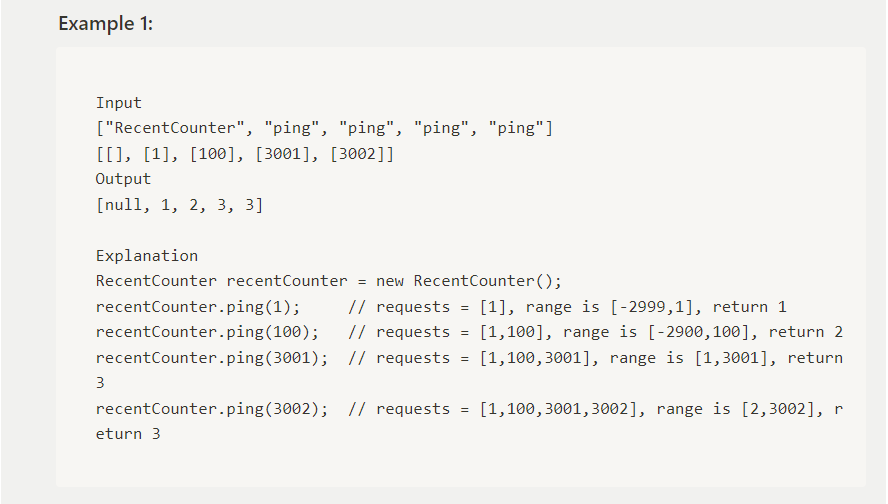

In [14]:
class RecentCounter:
    def __init__(self):
        self.q = deque()

    def ping(self, t: int) -> int:
        self.q.append(t)
        while self.q[0] < t - 3000:
            self.q.popleft()
        return len(self.q)


**Question 5**

There are `n` friends that are playing a game. The friends are sitting in a circle and are numbered from `1` to `n` in **clockwise order**. More formally, moving clockwise from the `ith` friend brings you to the `(i+1)th` friend for `1 <= i < n`, and moving clockwise from the `nth` friend brings you to the `1st` friend.

The rules of the game are as follows:

1. **Start** at the `1st` friend.
2. Count the next `k` friends in the clockwise direction **including** the friend you started at. The counting wraps around the circle and may count some friends more than once.
3. The last friend you counted leaves the circle and loses the game.
4. If there is still more than one friend in the circle, go back to step `2` **starting** from the friend **immediately clockwise** of the friend who just lost and repeat.
5. Else, the last friend in the circle wins the game.

Given the number of friends, `n`, and an integer `k`, return *the winner of the game*.

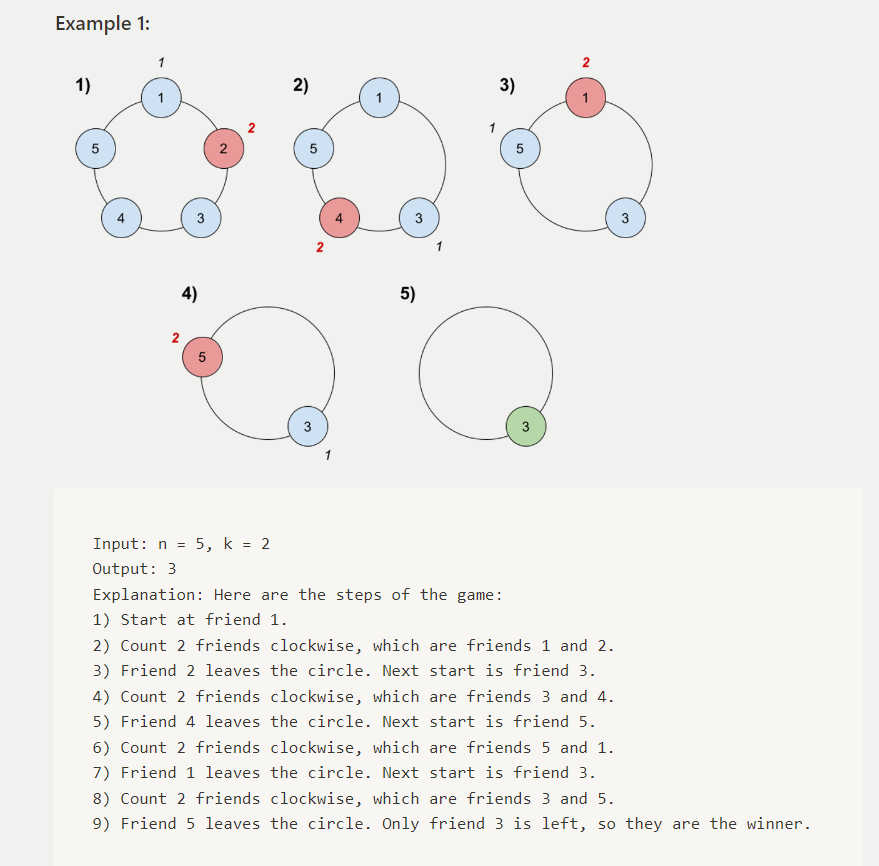

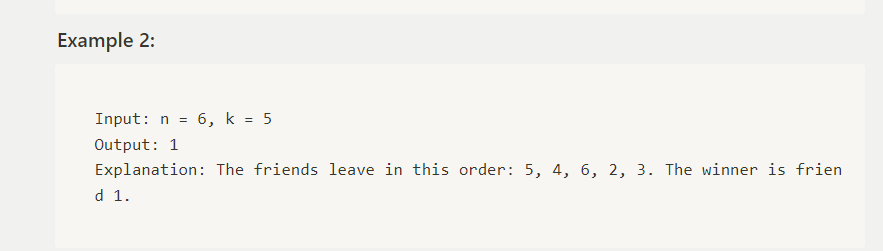

In [15]:
class Solution :
    def  findTheWinner(self, n,  k) :
        return self.findWinnerHelper(n, k - 1) + 1
    def  findWinnerHelper(self, n,  k) :
        if (n == 1) :
            return 0
        return ((k + 1) % n + self.findWinnerHelper(n - 1, k)) % n

TC: O(n)
    
SC: O(1)

**Question 6**

You are given an integer array `deck`. There is a deck of cards where every card has a unique integer. The integer on the `ith` card is `deck[i]`.

You can order the deck in any order you want. Initially, all the cards start face down (unrevealed) in one deck.

You will do the following steps repeatedly until all cards are revealed:

1. Take the top card of the deck, reveal it, and take it out of the deck.
2. If there are still cards in the deck then put the next top card of the deck at the bottom of the deck.
3. If there are still unrevealed cards, go back to step 1. Otherwise, stop.

Return *an ordering of the deck that would reveal the cards in increasing order*.

**Note** that the first entry in the answer is considered to be the top of the deck.

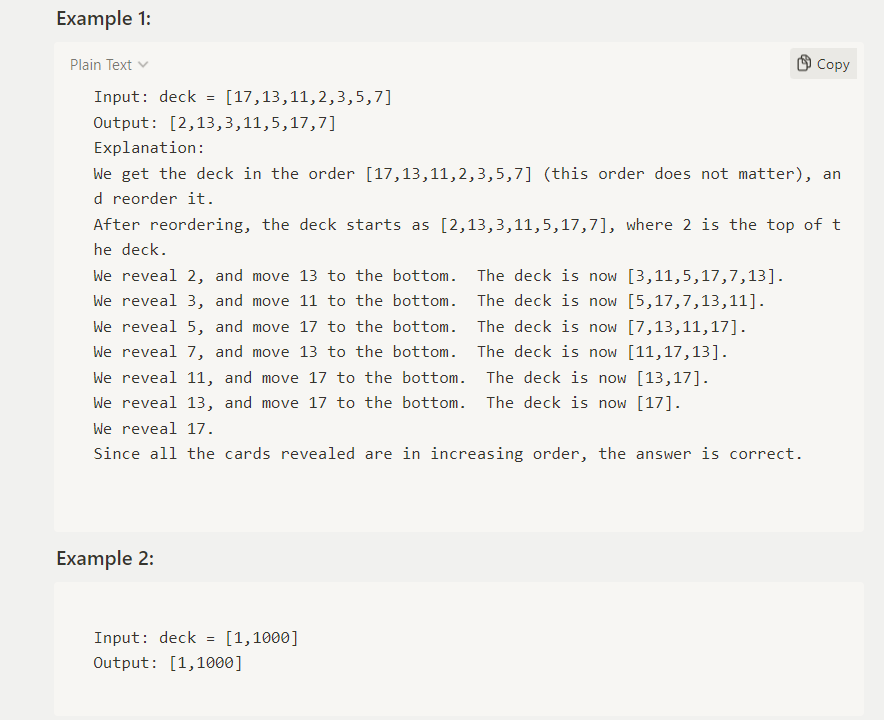

In [16]:
class Solution:
      def deckRevealedIncreasing(self, deck: List[int]) -> List[int]:
        q = collections.deque()

        for card in reversed(sorted(deck)):
          q.rotate()
          q.appendleft(card)

        return list(q)

TC: O(n)
    
SC:O(1)

**Question 7**

Design a queue that supports `push` and `pop` operations in the front, middle, and back.

Implement the `FrontMiddleBack` class:

- `FrontMiddleBack()` Initializes the queue.
- `void pushFront(int val)` Adds `val` to the **front** of the queue.
- `void pushMiddle(int val)` Adds `val` to the **middle** of the queue.
- `void pushBack(int val)` Adds `val` to the **back** of the queue.
- `int popFront()` Removes the **front** element of the queue and returns it. If the queue is empty, return `1`.
- `int popMiddle()` Removes the **middle** element of the queue and returns it. If the queue is empty, return `1`.
- `int popBack()` Removes the **back** element of the queue and returns it. If the queue is empty, return `1`.

**Notice** that when there are **two** middle position choices, the operation is performed on the **frontmost** middle position choice. For example:

- Pushing `6` into the middle of `[1, 2, 3, 4, 5]` results in `[1, 2, 6, 3, 4, 5]`.
- Popping the middle from `[1, 2, 3, 4, 5, 6]` returns `3` and results in `[1, 2, 4, 5, 6]`.

**Example 1:**
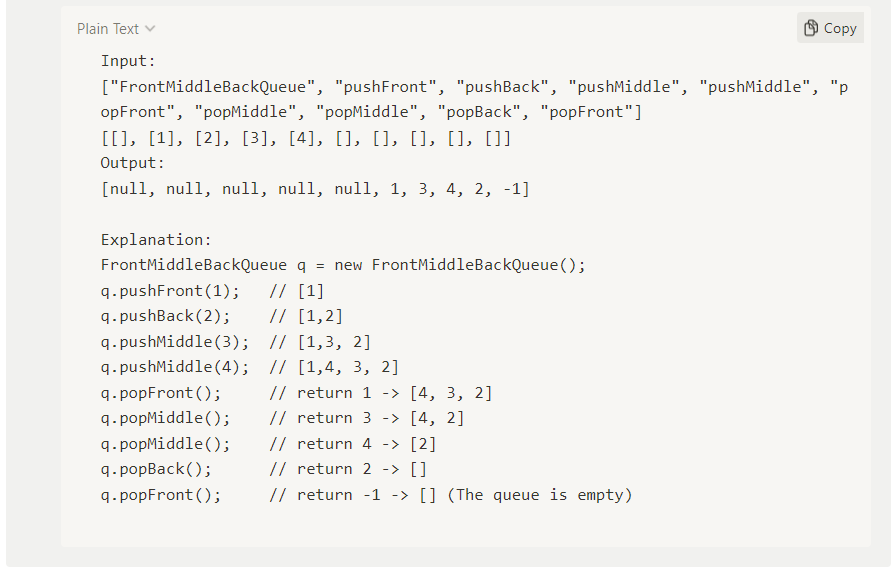

In [17]:
import collections


class FrontMiddleBackQueue(object):

    def __init__(self):
        self.__left, self.__right = collections.deque(), collections.deque()   

    def pushFront(self, val):
        """
        :type val: int
        :rtype: None
        """
        self.__left.appendleft(val)
        self.__balance()        

    def pushMiddle(self, val):
        """
        :type val: int
        :rtype: None
        """
        if len(self.__left) > len(self.__right):
            self.__right.appendleft(self.__left.pop())
        self.__left.append(val)

    def pushBack(self, val):
        """
        :type val: int
        :rtype: None
        """
        self.__right.append(val)
        self.__balance()

    def popFront(self):
        """
        :rtype: int
        """
        val = (self.__left or collections.deque([-1])).popleft()
        self.__balance()
        return val

    def popMiddle(self):
        """
        :rtype: int
        """
        val = (self.__left or [-1]).pop()
        self.__balance()
        return val

    def popBack(self):
        """
        :rtype: int
        """
        val = (self.__right or self.__left or [-1]).pop()
        self.__balance()
        return val

    def __balance(self):
        if len(self.__left) > len(self.__right)+1:
            self.__right.appendleft(self.__left.pop())
        elif len(self.__left) < len(self.__right):
            self.__left.append(self.__right.popleft())

TC: O(n)
    
SC: O(1)

**Question 8**

For a stream of integers, implement a data structure that checks if the last `k` integers parsed in the stream are **equal** to `value`.

Implement the **DataStream** class:

- `DataStream(int value, int k)` Initializes the object with an empty integer stream and the two integers `value` and `k`.
- `boolean consec(int num)` Adds `num` to the stream of integers. Returns `true` if the last `k` integers are equal to `value`, and `false` otherwise. If there are less than `k` integers, the condition does not hold true, so returns `false`.


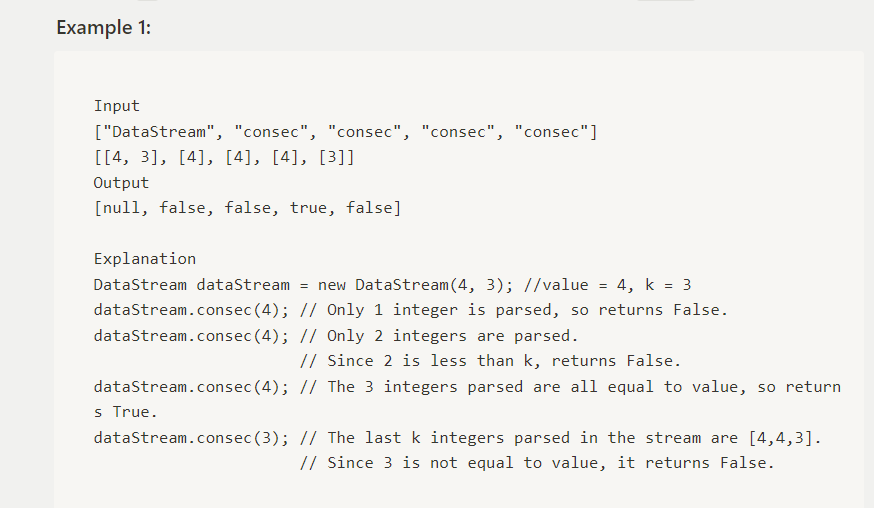

In [18]:
def binarySearch(arr, item, low, high):

    if (low >= high):
        return (low + 1) if (item > arr[low]) else low

    mid = (low + high) // 2

    if (item == arr[mid]):
        return mid + 1

    if (item > arr[mid]):
        return binarySearch(arr, item, mid + 1, high)

    return binarySearch(arr, item, low, mid - 1)

# Function to print median of stream of integers


def printMedian(arr, n):

    i, j, pos, num = 0, 0, 0, 0
    count = 1

    print(f"Median after reading 1 element is {arr[0]}.0")

    for i in range(1, n):
        median = 0
        j = i - 1
        num = arr[i]

        # find position to insert current element in sorted
        # part of array
        pos = binarySearch(arr, num, 0, j)
    
        # move elements to right to create space to insert
        # the current element
        while (j >= pos):
            arr[j + 1] = arr[j]
            j -= 1

        arr[j + 1] = num

        # increment count of sorted elements in array
        count += 1

        # if odd number of integers are read from stream
        # then middle element in sorted order is median
        # else average of middle elements is median
        if (count % 2 != 0):
            median = arr[count // 2] / 1

        else:
            median = (arr[(count // 2) - 1] + arr[count // 2]) / 2

        print(f"Median after reading {i + 1} elements is {median} ")


# Driver Code
if __name__ == "__main__":

    arr = [5, 15, 1, 3, 2, 8, 7, 9, 10, 6, 11, 4]
    n = len(arr)

    printMedian(arr, n)

Median after reading 1 element is 5.0
Median after reading 2 elements is 10.0 
Median after reading 3 elements is 5.0 
Median after reading 4 elements is 4.0 
Median after reading 5 elements is 3.0 
Median after reading 6 elements is 4.0 
Median after reading 7 elements is 5.0 
Median after reading 8 elements is 6.0 
Median after reading 9 elements is 7.0 
Median after reading 10 elements is 6.5 
Median after reading 11 elements is 7.0 
Median after reading 12 elements is 6.5 


TC: O(n)
    
SC: O(1)